In [36]:
import cv2
import math
import numpy as np

In [37]:
image = cv2.imread("images\houghtransform_2.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray) # flip image background
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

In [38]:
coords = np.column_stack(np.where(thresh > 0)) # (x,y) coordinates of pixels > 0
angle = cv2.minAreaRect(coords)[-1] # angle of minimum rotated bounding box

In [39]:
if angle < -45:
    angle = -(90 + angle)
# otherwise, just take the inverse of the angle to make
else:
    angle = angle

In [40]:
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0) # get rotation matrix
rotated_image = cv2.warpAffine(image, M, (w, h),
                         flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

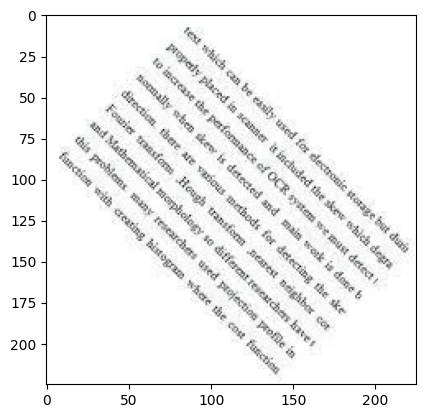

In [41]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

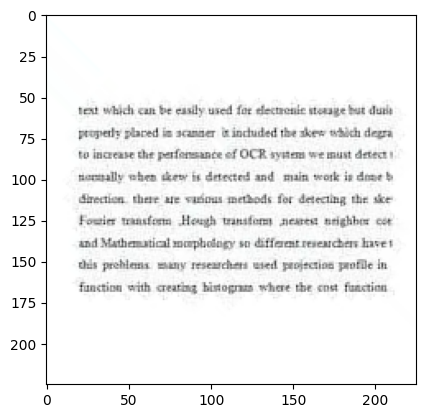

In [42]:
plt.imshow(rotated_image)
plt.show()